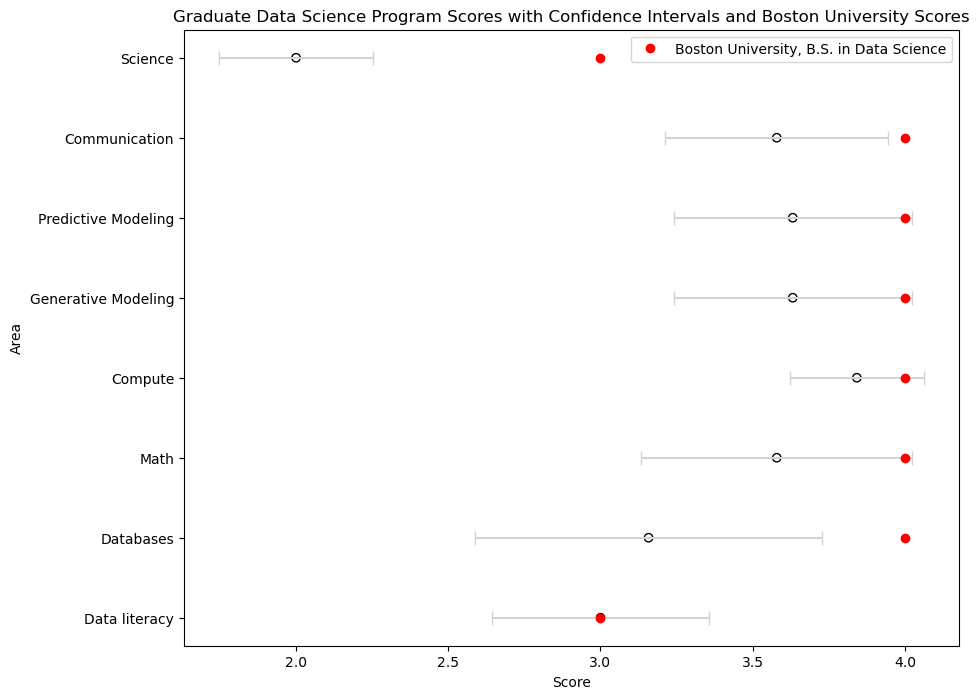

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data
gds = pd.read_csv('data/scores-gds.csv')
# Calculate the mean scores and confidence intervals for each GDS area
areas = ['GDS.Data.literacy', 'GDS.Databases', 'GDS.Math', 'GDS.Compute', 'GDS.Generative.Modeling',
         'GDS.Predictive.Modeling', 'GDS.Communication', 'GDS.Science']

# Helper function to calculate mean and 95% confidence interval
def mean_confidence_interval(data):
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    h = std * 1.96 / np.sqrt(n) # 95% confidence interval
    return mean, mean - h, mean + h

# Store the means and confidence intervals
means = []
conf_intervals = []

for area in areas:
    mean, lower, upper = mean_confidence_interval(gds[area])
    means.append(mean)
    conf_intervals.append((mean - lower, upper - mean))

# Convert the intervals into a format suitable for errorbar plotting (asymmetric error bars)
lower_errors = [conf[0] for conf in conf_intervals]
upper_errors = [conf[1] for conf in conf_intervals]
asymmetric_error = [lower_errors, upper_errors]

# Extract Boston University's scores for each area
bu_data = gds[gds['Institution'].str.contains('Boston University', case=False, na=False)]
bu_scores = [bu_data[area].mean() if not bu_data[area].empty else None for area in areas]


# Create the dot plot with confidence intervals
plt.figure(figsize=(10, 8))
area_names = [area.replace('GDS.', '').replace('.', ' ') for area in areas]
y_positions = range(len(area_names), 0, -1)
for i, y in enumerate(y_positions):
    plt.scatter(means[i], y, marker='o', edgecolor='black', facecolors='none', zorder=1)
plt.errorbar(means, y_positions, xerr=asymmetric_error, fmt='none', ecolor='lightgray', capsize=5, zorder=2)
# Plotting the Boston University data as red dots on top
plt.plot(bu_scores, y_positions, 'ro', label='Boston University, B.S. in Data Science', zorder=3)
plt.yticks(y_positions, area_names)
plt.xlabel('Score')
plt.ylabel('Area')
plt.title('GDS Scores with Confidence Intervals and Boston University Scores')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [2]:
# Import data
nasem = pd.read_csv('data/scores-nasem.csv')
nasem

,Institution,Program,NASEM.Math.01,NASEM.Math.02,NASEM.Math.03,NASEM.Math.04,NASEM.Math.05,NASEM.Math.06,NASEM.Compute.01,NASEM.Compute.02,...,NASEM.Communication.02,NASEM.Communication.03,NASEM.Communication.04,NASEM.Communication.05,NASEM.Domain.01,NASEM.Ethics.01,NASEM.Ethics.02,NASEM.Ethics.03,NASEM.Ethics.04,NASEM.Ethics.05
0,Ohio State University - Main Campus,B.S. in Data Analytics,1,1,4,4,4,4,4,4,...,2,2,3,2,2,1,1,1,1,1
1,Pennsylvania State University - Main Campus,"B.S. in Data Sciences, Applied Data Science op...",4,4,4,4,4,2,4,4,...,3,3,4,4,1,1,4,1,1,1
2,Pennsylvania State University - Main Campus,"B.S. in Data Sciences, Computational Science o...",4,2,4,4,4,2,4,4,...,3,3,4,4,1,1,4,1,1,1
3,Stanford University,Data Science Minor,1,4,3,4,2,2,4,4,...,2,2,3,2,4,1,1,2,2,1
4,University of Arizona,Statistics and Data Science BA,1,4,4,4,2,4,4,4,...,2,2,3,2,3,1,1,1,1,1
5,University of Arizona,Statistics and Data Science BS,1,4,4,4,2,4,4,4,...,2,2,3,2,3,1,1,1,1,1
6,University of California - Berkeley,B.A. in Data Science,1,1,4,4,1,1,4,4,...,2,2,3,2,2,2,4,2,1,1
7,University of California - Davis,B.S. in Statistics: Statistical Data Science,1,4,4,4,1,2,4,4,...,3,3,3,2,1,1,1,1,1,1
8,University of Colorado - Boulder,B.A. in Statistics and Data Science,1,4,4,4,1,1,4,4,...,3,3,4,4,2,2,2,2,2,1
9,University of Illinois Urbana-Champaign,Certificate in Data Science,1,1,3,2,1,1,2,2,...,2,2,3,2,2,1,1,1,1,1


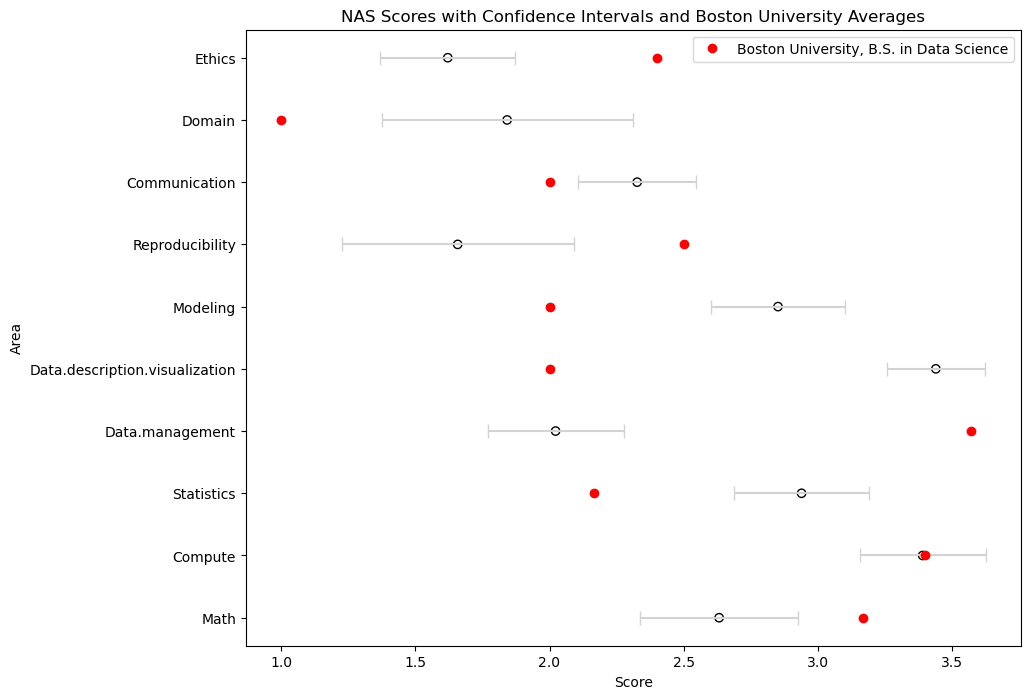

In [5]:
# Import data
nasem_data = pd.read_csv('data/scores-nasem.csv')
# Define and calculate averages for main categories
main_categories = ['NASEM.Math', 'NASEM.Compute', 'NASEM.Statistics', 'NASEM.Data.management', 'NASEM.Data.description.visualization', 'NASEM.Modeling', 'NASEM.Reproducibility', 'NASEM.Communication', 'NASEM.Domain', 'NASEM.Ethics']
for category in main_categories:
    nasem_data = calculate_category_averages(nasem_data, category)

# Filter out the scores for Boston University
bu_nasem_data = nasem_data[nasem_data['Institution'].str.contains('Boston University', case=False, na=False)]

# Extract Boston University's average scores
bu_nasem_scores = [bu_nasem_data[category].mean() if not bu_nasem_data[category].empty else None for category in main_categories]

# Recalculate the confidence intervals
nasem_means = []
nasem_conf_intervals = []
for category in main_categories:
    mean, lower, upper = mean_confidence_interval(nasem_data[category])
    nasem_means.append(mean)
    nasem_conf_intervals.append((mean - lower, upper - mean))

# Convert intervals for errorbar plotting
lower_errors = [conf[0] for conf in nasem_conf_intervals]
upper_errors = [conf[1] for conf in nasem_conf_intervals]
asymmetric_error = [lower_errors, upper_errors]

# Create the dot plot with confidence intervals
plt.figure(figsize=(10, 8))
nasem_area_names = [category.replace('NASEM.', '') for category in main_categories]
y_positions = range(len(nasem_area_names), 0, -1)

# Plotting the average scores with hollow dots
for i, y in enumerate(y_positions):
    plt.scatter(nasem_means[i], y, marker='o', edgecolor='black', facecolors='none', zorder=1)

# Plotting the error bars
plt.errorbar(nasem_means, y_positions, xerr=asymmetric_error, fmt='none', ecolor='lightgray', capsize=5, zorder=2)

# Plotting the Boston University data as red dots on top
plt.plot(bu_nasem_scores, y_positions, 'ro', label='Boston University, B.S. in Data Science', zorder=3)

# Set y-axis to display the area names
plt.yticks(y_positions, nasem_area_names)

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Area')
plt.title('NAS Scores with Confidence Intervals and Boston University Averages')

# Add legend
plt.legend()

# Invert y-axis for better layout
plt.gca().invert_yaxis()

# Show the plot
plt.show()
